In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("../data/output/finalized.csv", low_memory=False)
df.head()

,casenumber,incident_date,death_date,age,gender,race,latino,cold_related,heat_related,commissioner_district,...,toxic_primary,toxic_secondary,tramadol_primary,tramadol_secondary,u-47700_primary,u-49900_primary,valeryl_primary,xylazine_primary,xylazine_secondary,nitazene
0,ME2022-06565,2022-07-12T02:38:00.000,2022-07-12,74.0,Male,White,0,0,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ME2022-06564,2022-07-11T23:46:00.000,2022-07-12,NaN,Male,Black,0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,ME2022-06563,2022-07-02T00:00:00.000,2022-07-11,28.0,Male,Black,0,0,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,ME2022-06562,2022-07-11T20:48:00.000,2022-07-11,62.0,Female,White,0,0,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ME2022-06561,2022-07-11T19:50:00.000,2022-07-11,62.0,Male,White,0,0,0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df = df[(df.fentanyl_primary == 1.0) | (df.fentanyl_secondary == 1.0)].copy()
df['incident_date'] = pd.to_datetime(df['incident_date'])
dff = df[df['incident_date'] < '7/1/2022'].copy()
dff

,casenumber,incident_date,death_date,age,gender,race,latino,cold_related,heat_related,commissioner_district,...,toxic_primary,toxic_secondary,tramadol_primary,tramadol_secondary,u-47700_primary,u-49900_primary,valeryl_primary,xylazine_primary,xylazine_secondary,nitazene
421,ME2022-06144,2022-05-29 15:00:00,2022-06-22,57.0,Male,Unknown,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
609,ME2022-05956,2022-06-13 22:58:00,2022-06-13,38.0,Female,White,0,0,0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
617,ME2022-05948,2022-06-13 13:57:00,2022-06-13,30.0,Male,White,0,0,0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
676,ME2022-05889,2022-06-10 18:00:00,2022-06-10,58.0,Male,Black,0,0,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
691,ME2022-05874,2022-06-09 19:40:00,2022-06-09,45.0,Male,White,0,0,0,11.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66759,ME2014-01235,2014-10-31 00:00:00,2014-10-31,48.0,Female,Black,0,0,0,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
66896,ME2014-01098,2014-10-22 20:00:00,2014-10-22,40.0,Male,White,0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
66917,ME2014-01077,2014-10-21 07:15:00,2014-10-21,44.0,Female,White,0,0,0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
67010,ME2014-00984,2014-10-15 11:48:00,2014-10-15,49.0,Female,Black,0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
def flag_case_control(row: pd.Series) -> str:
    xylazine1 = row["xylazine_primary"]
    xylazine2 = row["xylazine_secondary"]

    if xylazine1 == 1.0 or xylazine2 == 1.0:
        return "case"
    elif xylazine1 != 1.0 or xylazine2 != 1.0:
        return "control"
    else:
        return "error"


In [5]:
feature_cols = [
    "casenumber",
    "age",
    "race",
    "gender",
    "latino",
    "xylazine_primary", 
    "xylazine_secondary",
    "fentanyl_primary",
    "fentanyl_secondary",
    "final_latitude",
    "final_longitude",
]

In [7]:
df2 = dff[feature_cols].copy()
df2['case_control'] = df2.apply(flag_case_control, axis=1)
print(df2.shape)
# case = df2[df2['case_control'] == 'case'].copy()
# control = df2[df2['case_control'] == 'control'].copy()
# case['case_control'] = 1
# control['case_control'] = 0

(6898, 12)


In [8]:
df2.head()

,casenumber,age,race,gender,latino,xylazine_primary,xylazine_secondary,fentanyl_primary,fentanyl_secondary,final_latitude,final_longitude,case_control
421,ME2022-06144,57.0,Unknown,Male,0,NaN,NaN,1.0,NaN,NaN,NaN,control
609,ME2022-05956,38.0,White,Female,0,1.0,NaN,1.0,NaN,41.865180,-87.745063,case
617,ME2022-05948,30.0,White,Male,0,NaN,NaN,1.0,NaN,42.013683,-88.193537,control
676,ME2022-05889,58.0,Black,Male,0,1.0,NaN,1.0,NaN,41.750815,-87.616426,case
691,ME2022-05874,45.0,White,Male,0,NaN,NaN,1.0,NaN,41.729889,-87.770719,control


In [9]:
df2.to_csv("cases_and_controls.csv", index=False)

In [34]:
df2.case_control.value_counts()

control    6558
case        228
Name: case_control, dtype: int64

In [35]:
case.to_csv("cases.csv", index=False)
control.to_csv("controls.csv", index=False)

In [2]:

cases_with_distances = pd.read_csv("cases_with_distances.csv")
controls_with_distances = pd.read_csv("controls_with_distances.csv")

In [3]:
sampled_cases = cases_with_distances.sample(len(cases_with_distances))
sampled_controls = controls_with_distances.sample(3 * int(len(cases_with_distances)))

In [4]:
sampled_cases

,age,gender,race,latino,casenumber,xylazine_primary,xylazine_secondary,fentanyl_primary,fentanyl_secondary,final_latitude,final_longitude,case_control,avg_distance
173,35.0,Male,White,0,ME2020-10278,1.0,NaN,1.0,NaN,41.609173,-87.648164,case,28.9647
150,56.0,Male,Black,0,ME2021-00799,1.0,NaN,1.0,NaN,41.902393,-87.732489,case,12.0434
18,27.0,Female,White,0,ME2022-03083,1.0,NaN,1.0,NaN,41.758922,-87.818633,case,18.0312
94,24.0,Female,White,1,ME2021-07768,1.0,NaN,1.0,NaN,42.152308,-88.013025,case,42.0120
112,49.0,Male,Black,0,ME2021-06643,1.0,NaN,1.0,NaN,41.687857,-87.622641,case,22.0983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,30.0,Male,Black,0,ME2022-04428,1.0,NaN,1.0,NaN,41.984667,-87.861041,case,21.5608
151,34.0,Male,White,1,ME2021-00650,1.0,NaN,1.0,NaN,41.729210,-87.802925,case,19.3972
216,54.0,Male,Black,0,ME2019-03530,1.0,NaN,1.0,NaN,41.757640,-87.585176,case,18.3275
129,38.0,Male,Black,0,ME2021-05102,1.0,NaN,1.0,NaN,41.534848,-87.649827,case,36.5265


In [5]:
sampled_controls

,age,gender,race,latino,casenumber,xylazine_primary,xylazine_secondary,fentanyl_primary,fentanyl_secondary,final_latitude,final_longitude,case_control,avg_distance
176,52.0,Male,Black,0,ME2022-03402,NaN,NaN,1.0,NaN,41.771716,-87.584083,control,52.0056
685,26.0,Male,White,0,ME2021-10030,NaN,NaN,1.0,NaN,42.040887,-88.100652,control,74.3857
946,38.0,Female,Black,0,ME2021-08014,NaN,NaN,1.0,NaN,41.755541,-87.554642,control,54.2226
1718,29.0,Male,White,1,ME2021-02984,NaN,NaN,1.0,NaN,41.814489,-87.692903,control,47.5763
6198,20.0,Male,White,0,ME2016-03021,NaN,NaN,1.0,NaN,42.029705,-87.888608,control,61.6029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,37.0,Male,White,1,ME2020-15411,NaN,NaN,1.0,NaN,41.866420,-87.697237,control,46.7769
918,37.0,Female,White,0,ME2021-08250,NaN,NaN,1.0,NaN,42.106789,-88.123511,control,79.9736
4212,42.0,Male,White,0,ME2019-01469,NaN,NaN,1.0,NaN,41.857830,-87.744730,control,47.0712
2344,44.0,Male,Black,0,ME2020-10807,NaN,NaN,1.0,NaN,41.861055,-87.716167,control,46.6770


In [7]:
combined: pd.DataFrame = pd.concat([sampled_cases, sampled_controls], ignore_index=True)  # type: ignore
combined.sample(10)

,age,gender,race,latino,casenumber,xylazine_primary,xylazine_secondary,fentanyl_primary,fentanyl_secondary,final_latitude,final_longitude,case_control,avg_distance
86,42.0,Male,White,0,ME2019-00155,1.0,NaN,1.0,NaN,41.980552,-87.665153,case,18.3491
528,61.0,Male,Black,0,ME2020-07167,NaN,NaN,1.0,NaN,41.881426,-87.753014,control,47.3739
789,55.0,Male,Black,0,ME2022-03158,NaN,NaN,1.0,NaN,41.960988,-87.757125,control,51.8275
191,60.0,Male,Black,0,ME2021-10111,1.0,NaN,1.0,NaN,41.884705,-87.742794,case,11.5156
842,54.0,Male,Black,0,ME2019-03389,NaN,NaN,1.0,NaN,41.871949,-87.716791,control,46.7009
609,47.0,Male,Black,0,ME2017-04093,NaN,NaN,1.0,NaN,41.886719,-87.764503,control,47.8382
849,30.0,Male,White,0,ME2021-11107,NaN,NaN,1.0,NaN,41.923215,-87.803592,control,50.7843
539,32.0,Male,White,1,ME2017-01687,NaN,NaN,1.0,NaN,42.063452,-87.866169,control,63.5482
471,38.0,Male,White,0,ME2019-04312,NaN,NaN,1.0,NaN,41.897225,-87.700682,control,47.4605
836,45.0,Male,White,1,ME2020-00801,NaN,NaN,1.0,NaN,41.830594,-87.644074,control,48.1599


In [21]:
combined.groupby('case_control').mean()['avg_distance']

case_control
case       16.609187
control    52.095989
Name: avg_distance, dtype: float64

In [25]:

def categorize_age(age: float) -> str:
    if pd.isna(age):
        return "Unknown"
    if age < 18:
        return "Under 18"
    elif 18 <= age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    else:
        raise ValueError("Unexpected age: {}".format(age))


combined["age_category"] = combined["age"].apply(categorize_age)


combined.groupby(
    ["case_control", "age_category", "latino", "race", "gender"]
).describe()["avg_distance"]
# .to_csv("groups.csv")


count      mean       std  \
case_control age_category latino race  gender                              
case         18-24        0      Black Female    2.0  13.71805  3.382870   
                                       Male      1.0  11.41320       NaN   
                                 Other Male      1.0  34.52490       NaN   
                                 White Female    1.0  16.62000       NaN   
                                       Male      2.0  20.67350  1.149756   
...                                              ...       ...       ...   
control      65+          1      White Female    1.0  48.69610       NaN   
                                       Male      2.0  47.23435  0.712834   
             Under 18     0      White Female    1.0  65.41930       NaN   
                          1      White Male      1.0  52.97360       NaN   
             Unknown      0      White Male      1.0  46.70430       NaN   

                                                   min        25%       50%  \
case_control age_category latino race  gender                                 
case         18-24        0      Black Female  11.3260  12.522025  13.71805   
                                       Male    11.4132  11.413200  11.41320   
                                 Other Male    34.5249  34.524900  34.52490   
                                 White Female  16.6200  16.620000  16.62000   
                                       Male    19.8605  20.267000  20.67350   
...                                                ...        ...       ...   
control      65+          1      White Female  48.6961  48.696100  48.69610   
                                       Male    46.7303  46.982325  47.23435   
             Under 18     0      White Female  65.4193  65.419300  65.41930   
                          1      White Male    52.9736  52.973600  52.97360   
             Unknown      0      White Male    46.7043  46.704300  46.70430   

                                                     75%      max  
case_control age_category latino race  gender                      
case         18-24        0      Black Female  14.914075  16.1101  
                                       Male    11.413200  11.4132  
                                 Other Male    34.524900  34.5249  
                                 White Female  16.620000  16.6200  
                                       Male    21.080000  21.4865  
...                                                  ...      ...  
control      65+          1      White Female  48.696100  48.6961  
                                       Male    47.486375  47.7384  
             Under 18     0      White Female  65.419300  65.4193  
                          1      White Male    52.973600  52.9736  
             Unknown      0      White Male    46.704300  46.7043  

[81 rows x 8 columns]

In [ ]:
from pymatch.Matcher import Matcher

m = Matcher(case, control, yvar='case_control', exclude=[])
m

In [25]:
import scanpy as sc
import squidpy as sq

adata = sq.datasets.slideseqv2()
adata

  0%|          | 0.00/251M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
mode = "L"
val = sq.gr.ripley(adata, cluster_key="cluster", mode=mode)
viz = sq.pl.ripley(adata, cluster_key="cluster", mode=mode)
viz

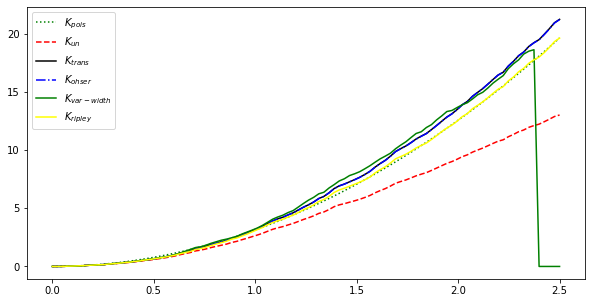

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.stats import RipleysKEstimator

z = np.random.uniform(low=5, high=10, size=(100, 2))
Kest = RipleysKEstimator(area=25, x_max=10, y_max=10, x_min=5, y_min=5)

r = np.linspace(0, 2.5, 100)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
plt.plot(r, Kest(data=z, radii=r, mode='none'), color='red', ls='--',
        label=r'$K_{un}$')
plt.plot(r, Kest(data=z, radii=r, mode='translation'), color='black',
        label=r'$K_{trans}$')
plt.plot(r, Kest(data=z, radii=r, mode='ohser'), color='blue', ls='-.',
        label=r'$K_{ohser}$')
plt.plot(r, Kest(data=z, radii=r, mode='var-width'), color='green',
        label=r'$K_{var-width}$')
plt.plot(r, Kest(data=z, radii=r, mode='ripley'), color='yellow',
        label=r'$K_{ripley}$')
plt.legend()

In [6]:
from scipy import spatial
import libpysal as ps
import numpy as np
from pointpats import ripley
%matplotlib inline
import matplotlib.pyplot as plt

/Users/nick/Projects/Kentucky/chicago-geo/.venv/lib/python3.9/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [19]:
case_points = case[['final_longitude', 'final_latitude']].dropna().to_numpy()
control_points = control[['final_longitude', 'final_latitude']].dropna().to_numpy()
control_points

array([[-87.62205256,  41.78272287],
       [-87.63400008,  41.63303241],
       [-87.75112332,  41.88403404],
       ...,
       [-87.86697044,  41.82224798],
       [-87.61946888,  41.79990633],
       [-87.73976595,  41.60119675]])

In [20]:
case_g_test = ripley.g_test(case_points, support=10, keep_simulations=True)
control_g_test = ripley.g_test(control_points, support=10, keep_simulations=True)

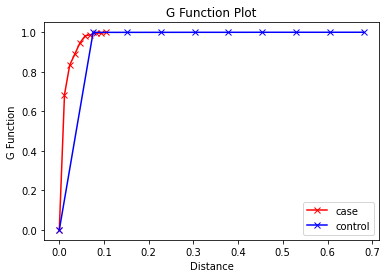

In [21]:
plt.plot(case_g_test.support, case_g_test.statistic, 
        marker='x', color='red', label='case')
plt.plot(control_g_test.support, control_g_test.statistic, 
        marker='x', color='blue', label='control')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()

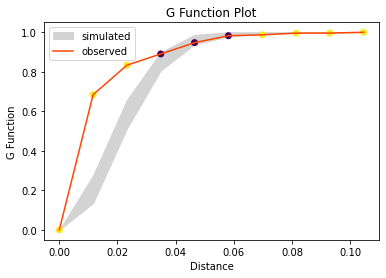

In [17]:
# grab the middle 95% of simulations using numpy:
middle_95pct = np.percentile(control_g_test.simulations, q=(2.5, 97.5), axis=0)
# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(control_g_test.support, *middle_95pct, 
                color='lightgrey', label='simulated')

# plot the line for the observed value of G(d)
plt.plot(control_g_test.support, control_g_test.statistic, 
        color='orangered', label='observed')
# and plot the support points depending on whether their p-value is smaller than .05
plt.scatter(control_g_test.support, control_g_test.statistic, 
        cmap='viridis', c=control_g_test.pvalue < .01)
plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')
plt.show()